In [0]:
#!/usr/bin/env python

In [0]:
#Import Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas.util.testing as tm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import plot_model
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.utils import np_utils

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
# #Cleaning Dataset and Exporting as csv
# data_attack = pd.read_csv('dataset_attack.csv')
# data_normal = pd.read_csv('dataset_normal.csv')
# data_normal.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
#        'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
#        'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
#        'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
#        'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
#        'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
#        'tcp.time_delta','class']
# data_attack.columns=[ 'frame.len', 'frame.protocols', 'ip.hdr_len',
#        'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset',
#        'ip.ttl', 'ip.proto', 'ip.src', 'ip.dst', 'tcp.srcport', 'tcp.dstport',
#        'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr',
#        'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push',
#        'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size',
#        'tcp.time_delta','class']
# data_normal.to_csv (r'dataset_normal_cleaned.csv', index=False, header=True)
# data_attack.to_csv (r'dataset_attack_cleaned.csv', index=False, header=True)

## Import Dataset from Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = "/content/drive/My Drive/Datasets/dataset_attack_cleaned.csv"
data_attack = pd.read_csv(path)
data_attack.head()

,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.ack,tcp.flags.res,tcp.flags.ns,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta,class
0,212,eth:ethertype:ip:udp:data,20,198,0,0,0,0,112,17,178.95.241.121,192.168.2.107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,attack
1,212,eth:ethertype:ip:udp:data,20,198,0,0,0,0,112,17,178.95.241.121,192.168.2.107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,attack
2,212,eth:ethertype:ip:udp:data,20,198,0,0,0,0,112,17,178.95.241.121,192.168.2.107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,attack
3,212,eth:ethertype:ip:udp:data,20,198,0,0,0,0,112,17,178.95.241.121,192.168.2.107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,attack
4,62,eth:ethertype:ip:udp:data,20,48,0,0,0,0,128,17,192.168.2.107,178.95.241.121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,attack


In [0]:
path = "/content/drive/My Drive/Datasets/dataset_normal_cleaned.csv"
data_normal = pd.read_csv(path)
data_normal.head()

,frame.len,frame.protocols,ip.hdr_len,ip.len,ip.flags.rb,ip.flags.df,p.flags.mf,ip.frag_offset,ip.ttl,ip.proto,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.len,tcp.ack,tcp.flags.res,tcp.flags.ns,tcp.flags.cwr,tcp.flags.ecn,tcp.flags.urg,tcp.flags.ack,tcp.flags.push,tcp.flags.reset,tcp.flags.syn,tcp.flags.fin,tcp.window_size,tcp.time_delta,class
0,206,eth:ethertype:ip:tcp:ssh,20,192,0,1,0,0,128,6,192.168.1.101,192.168.5.122,4175,22,152,1,0,0,0,0,0,1,1,0,0,0,16697,0.000000,normal
1,60,eth:ethertype:ip:tcp,20,40,0,1,0,0,64,6,192.168.5.122,192.168.1.101,22,4175,0,153,0,0,0,0,0,1,0,0,0,0,7504,0.000537,normal
2,60,eth:ethertype:ip:tcp,20,40,0,1,0,0,63,6,192.168.5.122,192.168.1.101,22,4175,0,153,0,0,0,0,0,1,0,0,0,0,7504,0.000155,normal
3,774,eth:ethertype:ip:tcp:ssh,20,760,0,1,0,0,64,6,192.168.5.122,192.168.1.101,22,4175,720,153,0,0,0,0,0,1,1,0,0,0,7504,0.004483,normal
4,774,eth:ethertype:ip:tcp,20,760,0,1,0,0,63,6,192.168.5.122,192.168.1.101,22,4175,720,153,0,0,0,0,0,1,1,0,0,0,7504,0.001321,normal


## Data Preprocessing

In [0]:
#Drop Unwanted Columns
data_normal=data_normal.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)
data_attack=data_attack.drop(['ip.src', 'ip.dst','frame.protocols'],axis=1)


In [0]:
# Feature Selection for training
features = data_attack.head(0)
features=data_attack.columns.tolist()
features.remove("class")
print(features)

['frame.len', 'ip.hdr_len', 'ip.len', 'ip.flags.rb', 'ip.flags.df', 'p.flags.mf', 'ip.frag_offset', 'ip.ttl', 'ip.proto', 'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.ack', 'tcp.flags.res', 'tcp.flags.ns', 'tcp.flags.cwr', 'tcp.flags.ecn', 'tcp.flags.urg', 'tcp.flags.ack', 'tcp.flags.push', 'tcp.flags.reset', 'tcp.flags.syn', 'tcp.flags.fin', 'tcp.window_size', 'tcp.time_delta']


In [0]:
#Combinig dataset for training and testing
X_normal= data_normal[features].values
X_attack= data_attack[features].values
Y_normal= data_normal['class']
Y_attack= data_attack['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

In [0]:
#Standardise Data to scale Numerical features
scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scalar.fit_transform(X)

In [0]:
# Transform Categorical values with Label Encoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)
print(Y)

[1 1 1 ... 0 0 0]


## Model Training

In [0]:
#Split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(Y_train)   

[0 0 0 ... 0 0 1]


## Create Model

In [0]:
# create the model
def create_baseline():
    model = Sequential()
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model. We use the the logarithmic loss function, and the Adam gradient optimizer.
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_baseline()

## Fit Training Data and Train model

In [0]:
Learn = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 25)

Train on 3621758 samples, validate on 905440 samples
Epoch 1/25
3621758/3621758 [==============================] - 141s 39us/step - loss: 0.3480 - accuracy: 0.8237 - val_loss: 0.3208 - val_accuracy: 0.8356
Epoch 2/25
3621758/3621758 [==============================] - 141s 39us/step - loss: 0.3108 - accuracy: 0.8479 - val_loss: 0.3029 - val_accuracy: 0.8576
Epoch 3/25
3621758/3621758 [==============================] - 146s 40us/step - loss: 0.3015 - accuracy: 0.8557 - val_loss: 0.3010 - val_accuracy: 0.8527
Epoch 4/25
3621758/3621758 [==============================] - 142s 39us/step - loss: 0.2978 - accuracy: 0.8569 - val_loss: 0.2978 - val_accuracy: 0.8584
Epoch 5/25
3621758/3621758 [==============================] - 143s 39us/step - loss: 0.2954 - accuracy: 0.8573 - val_loss: 0.2997 - val_accuracy: 0.8521
Epoch 6/25
3621758/3621758 [==============================] - 142s 39us/step - loss: 0.2947 - accuracy: 0.8574 - val_loss: 0.2947 - val_accuracy: 0.8556
Epoch 7/25
3621758/3621758 [=

## Display Output

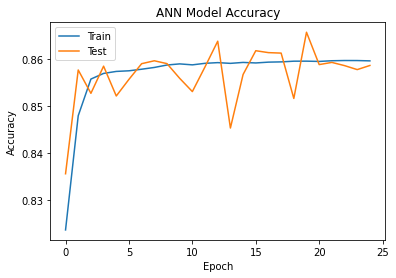

In [0]:
# Training and Validation Accuracy Values
plt.plot(Learn.history['accuracy'])
plt.plot(Learn.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

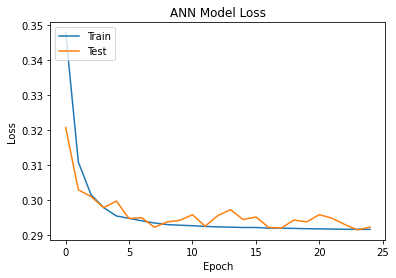

In [0]:
# Training and Validation Loss Values
plt.plot( Learn.history['loss'])
plt.plot(Learn.history['val_loss'])
plt.title('ANN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
predict = model.predict(X_test, verbose=1)

1131800/1131800 [==============================] - 14s 12us/step


In [0]:
# Calculate True Positive, True Negative, False Positive, False Negative
tp = 0
tn = 0
fp = 0
fn = 0
predictn = predict.flatten().round()
predictn = predictn.tolist()
Y_testn = Y_test.tolist()
for i in range(len(Y_testn)):
  if predictn[i]==1 and Y_testn[i]==1:
    tp+=1
  elif predictn[i]==0 and Y_testn[i]==0:
    tn+=1
  elif predictn[i]==0 and Y_testn[i]==1:
    fp+=1
  elif predictn[i]==1 and Y_testn[i]==0:
    fn+=1

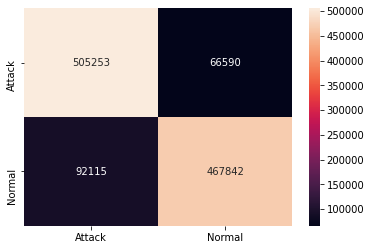

In [0]:
# Heatmap for Confusion Matrix
to_heat_map =[[tn,fp],[fn,tp]]
to_heat_map = pd.DataFrame(to_heat_map, index = ["Attack","Normal"],columns = ["Attack","Normal"])
ax = sns.heatmap(to_heat_map,annot=True, fmt="d")

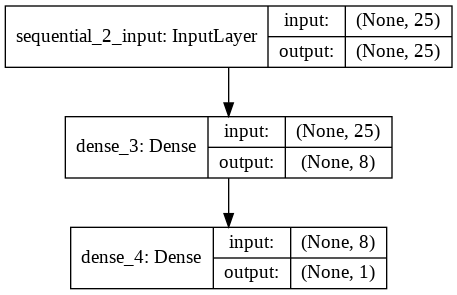

In [0]:
#Model Architecture
plot_model(model, show_shapes=True, show_layer_names=True)

In [0]:
# Accuracy
scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 29.11%
accuracy: 85.98%
